O RH da sua empresa soube que você está estudando ciência de dados e tem alguns dados de anos de experiência e salário na empresa. Eles precisam que você crie um modelo matemático pra facilitar o trabalho deles para na que hora da admissão, eles tenham uma estimativa justa de salário para o contratado conforme a experiência dele.

Aqui você vai precisar escolher qual é o melhor polinômio para ajustar os dados sem ter o perigo que criar um modelo muito complexo que possa ter overfitting. Os passos são os mesmos: plotar os dados, fazer a regressão com polinomios de até 4º grau, comparar resíduos, R² e RMSE. Você pode fazer um split 70/30 dos dados.

In [1]:
# aqui vai as bibliotecas que você vai usar
from yellowbrick.regressor import ResidualsPlot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

O dataset já está aqui carregado e você só vai precisar usar as variáveis X e y.

In [6]:
url = "https://s3.us-west-2.amazonaws.com/public.gamelab.fun/dataset/position_salaries.csv"
df = pd.read_csv(url)
X=df['Level'].values.reshape(-1,1) #anos de experiencia
y=df['Salary'].values.reshape(-1,1) #salário

In [7]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [6]:
df.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


Visualização dos dados


<AxesSubplot:xlabel='Level', ylabel='Salary'>

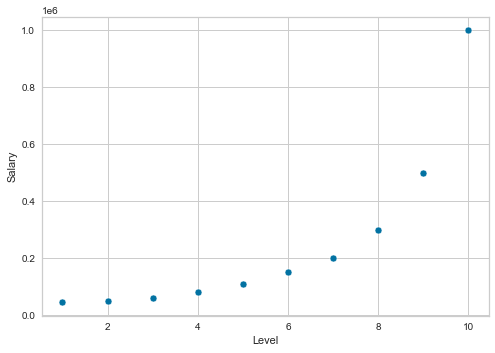

In [8]:
sns.scatterplot(data=df,x='Level',y='Salary')

Regressão linear

### OLS

In [12]:
reg1 = sm.OLS(y_train, X_train)
reg1fit = reg1.fit()

In [13]:
print(reg1fit.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.797
Model:                            OLS   Adj. R-squared (uncentered):              0.763
Method:                 Least Squares   F-statistic:                              23.59
Date:                Thu, 26 May 2022   Prob (F-statistic):                     0.00283
Time:                        05:19:11   Log-Likelihood:                         -95.403
No. Observations:                   7   AIC:                                      192.8
Df Residuals:                       6   BIC:                                      192.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\Anaconda\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [20]:
xtest=pd.DataFrame(X_test)
ytest=pd.DataFrame(y_test)

In [23]:
reg1fit.predict(xtest)

0    294453.125
1    117781.250
2    353343.750
dtype: float64

In [25]:
predY = pd.concat([ytest, reg1fit.predict(xtest)], axis = 1)
predY.columns = ['profReal', 'profPred']
predY

,profReal,profPred
0,110000,294453.125
1,50000,117781.250
2,150000,353343.750


In [27]:
from sklearn import metrics

In [33]:
print('Rquadrado', metrics.r2_score(predY['profReal'], predY['profPred']))
print('Raiz do erro quadrado médio', 
      np.sqrt(metrics.mean_squared_error(predY['profReal'], predY['profPred'])))


Rquadrado -14.782750099583678
Raiz do erro quadrado médio 163264.54385229168


### LinearRegression

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

poly_1 = LinearRegression()
poly_1.fit(X_train, y_train)
y_pred_teste_1=poly_1.predict(X_test)
y_pred_treino_1=poly_1.predict(X_train)

Métricas

In [10]:
print('RMSE treino: %.2f'% mean_squared_error(y_train, y_pred_treino_1))
print('RMSE teste: %.2f'% mean_squared_error(y_test, y_pred_teste_1))
print('R2 treino: %.2f'% r2_score(y_train, y_pred_treino_1))
print('R2 teste: %.2f'% r2_score(y_test, y_pred_teste_1))

RMSE treino: 32330439675.87
RMSE teste: 15274930597.24
R2 treino: 0.68
R2 teste: -8.04


Gráfico dos resíduos - Regressão linear


-8.044366800996716

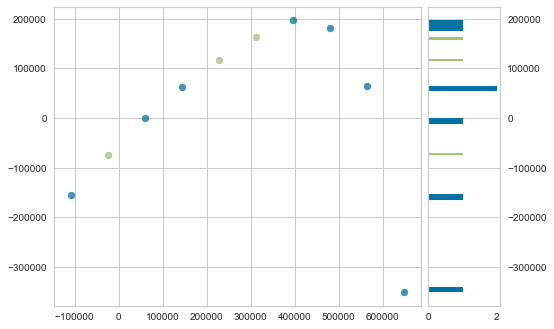

In [35]:
visualizer = ResidualsPlot(poly_1)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data

Comparação entre dados e predição

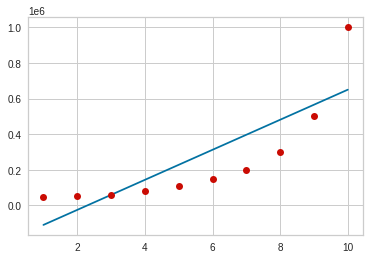

In [ ]:
plt.plot(X, poly_1.predict(X), 'b', X, y,'ro')

### Regressão quadrática

In [ ]:
# url = "https://s3.us-west-2.amazonaws.com/public.gamelab.fun/dataset/position_salaries.csv"
# df = pd.read_csv(url)
# X=df['Level'].values.reshape(-1,1) #anos de experiencia
# y=df['Salary'].values.reshape(-1,1) #salário

In [36]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X) #fazendo um polinomial

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=2)

poly_2 = LinearRegression() #criou o modelo
poly_2.fit(X_train, y_train) #treinou o modelo

y_pred_teste_2=poly_2.predict(X_test) #testando o modelo
y_pred_treino_2=poly_2.predict(X_train)

Métricas

In [38]:
print('RMSE treino: %.2f'% mean_squared_error(y_train, y_pred_treino_2))
print('RMSE teste: %.2f'% mean_squared_error(y_test, y_pred_teste_2))
print('R2 treino: %.2f'% r2_score(y_train, y_pred_treino_2))
print('R2 teste: %.2f'% r2_score(y_test, y_pred_teste_2))

RMSE treino: 8845125384.17
RMSE teste: 3255845702.62
R2 treino: 0.91
R2 teste: -0.93


Gráficos dos resíduos

-0.9278033765499452

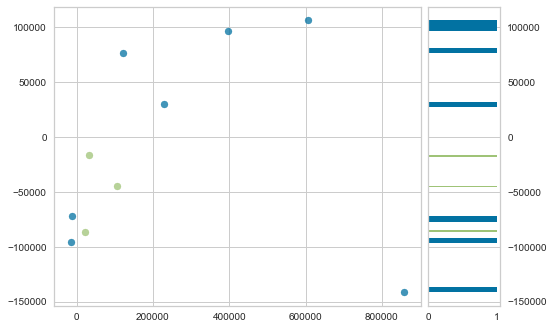

In [39]:
visualizer = ResidualsPlot(poly_2)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data

Comparação entre dados e predição 

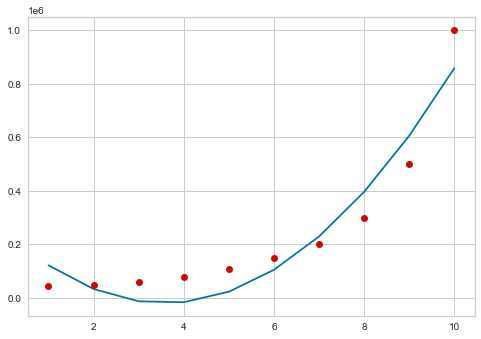

In [41]:
plt.plot(X, poly_2.predict(X_poly), 'b', X, y,'ro')

### Regressão cúbica

In [42]:
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=2)

poly_3 = LinearRegression()
poly_3.fit(X_train, y_train)

y_pred_teste_3=poly_3.predict(X_test)
y_pred_treino_3=poly_3.predict(X_train)

Métricas

In [43]:
print('RMSE treino: %.2f'% mean_squared_error(y_train, y_pred_treino_3))
print('RMSE teste: %.2f'% mean_squared_error(y_test, y_pred_teste_3))
print('R2 treino: %.2f'% r2_score(y_train, y_pred_treino_3))
print('R2 teste: %.2f'% r2_score(y_test, y_pred_teste_3))

RMSE treino: 1353470582.90
RMSE teste: 3062843386.53
R2 treino: 0.99
R2 teste: -0.81


Gráfico dos resíduos

-0.8135256893945888

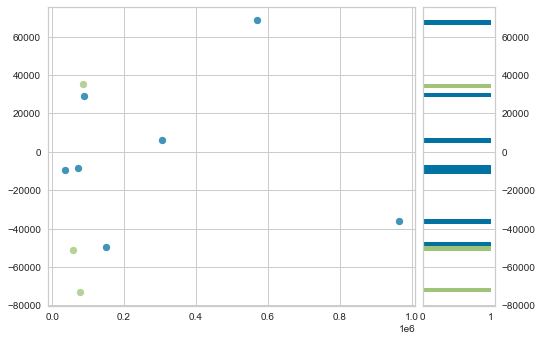

In [44]:
visualizer = ResidualsPlot(poly_3)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data

Comparação entre dados e predição

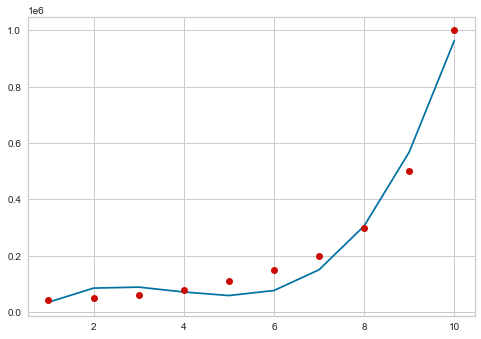

In [45]:
plt.plot(X, poly_3.predict(X_poly), 'b', X, y,'ro')

### Regressão Quártica

In [46]:
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=2)

poly_4 = LinearRegression()
poly_4.fit(X_train, y_train)
y_pred_teste_4=poly_4.predict(X_test)
y_pred_treino_4=poly_4.predict(X_train)

Métricas

In [51]:
print('RMSE treino: %.2f'% mean_squared_error(y_train, y_pred_treino_4))
print('RMSE teste: %.2f'% mean_squared_error(y_test, y_pred_teste_4))
print('R2 treino: %.2f'% r2_score(y_train, y_pred_treino_4))
print('R2 teste: %.2f'% r2_score(y_test, y_pred_teste_4))

RMSE treino: 159746225.04
RMSE teste: 851047206.81
R2 treino: 1.00
R2 teste: 0.50


Gráfico dos resíduos

0.4960904696538392

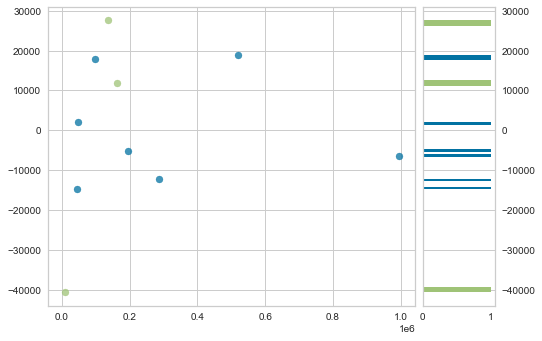

In [48]:
visualizer = ResidualsPlot(poly_4)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data

Comparação entre dados e predição

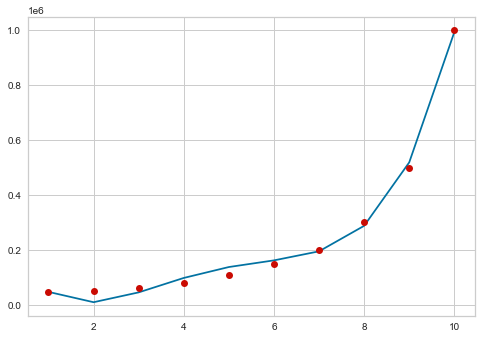

In [49]:
plt.plot(X, poly_4.predict(X_poly), 'b', X, y,'ro')

Conclusão

Aqui vemos que aparentemente o polinômio de quarto grau representa melhor o salário conforme o tempo de experiência. 

Vemos que pela quantidade de amostras ser baixo, o maior polinômio que poderiamos ter é o polinômio interpolador, fator nos limita.

Esse é um caso que talvez uma das decisões que precisariámos ter é dizer: "Precisamos de mais dados para fazer um bom modelo"